### Student Information
Name:王俊皓

Student ID:108021121

GitHub ID:mYstoRi

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

---start of homework---

In [35]:
#load data
import os

Ds = []
for file in os.listdir('sentiment labelled sentences'):
    if ('.txt' in file) & (not 'readme' in file):
        Ds += open('sentiment labelled sentences/'+file, 'r', encoding = 'utf-8')

Now take a look at what we have:

In [36]:
Ds[1000]

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  \t0\n'

In [37]:
len(Ds)

3000

seperating 0s and 1s:

In [38]:
D = []
for i in Ds:
    temp = i.split('\t')
    temp[1] = int(temp[1][0])
    D.append(temp.copy())

In [39]:
D[10:20]

[['And the sound quality is great.', 1],
 ['He was very impressed when going from the original battery to the extended battery.',
  1],
 ['If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.',
  0],
 ['Very good quality though', 1],
 ['The design is very odd, as the ear "clip" is not very comfortable at all.',
  0],
 ['Highly recommend for any one who has a blue tooth phone.', 1],
 ['I advise EVERYONE DO NOT BE FOOLED!', 0],
 ['So Far So Good!.', 1],
 ['Works great!.', 1],
 ['It clicks into place in a way that makes you wonder how long that mechanism would last.',
  0]]

In [40]:
len(D)

3000

Now we make our dataframe:

In [43]:
import pandas as pd

D = pd.DataFrame.from_records(D, columns= ['text', 'sgn'])

In [45]:
D[::10][:10]

,text,sgn
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


checking for dupes/missings:

In [47]:
#pasted
D.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,sgn
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [48]:
#pasted
sum(D.duplicated())

17

Seems like there's some duplicated texts. Let's see if any of them is intensional.
Since there's only 17 of them, we can check it manually.

In [53]:
for i in range(len(D)):
    if D.duplicated()[i]:
        print(D.loc[i])

text    Great phone!.
sgn                 1
Name: 285, dtype: object
text    Works great.
sgn                1
Name: 407, dtype: object
text    Works great!.
sgn                 1
Name: 524, dtype: object
text    Don't buy this product.
sgn                           0
Name: 543, dtype: object
text    If you like a loud buzzing to override all you...
sgn                                                     0
Name: 744, dtype: object
text    Does not fit.
sgn                 0
Name: 748, dtype: object
text    This is a great deal.
sgn                         1
Name: 778, dtype: object
text    Great Phone.
sgn                1
Name: 792, dtype: object
text    Excellent product for the price.
sgn                                    1
Name: 892, dtype: object
text    Great phone.
sgn                1
Name: 896, dtype: object
text    Definitely worth checking out.  
sgn                                    1
Name: 1363, dtype: object
text    Not recommended.  
sgn                      0
Name: 15

Besides no.543, the rest could be common in sense. So I'll say leave them as is.

Now we tokenize the texts.

In [55]:
#pasted
D['unigrams'] = D['text'].apply(lambda x: dmh.tokenize_text(x))

In [56]:
D[:20]

,text,sgn,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ..."
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h..."
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha..."
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]"
9,What a waste of money and time!.,0,"[What, a, waste, of, money, and, time, !, .]"


In [71]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import numpy as np

count_vect = CountVectorizer(dtype = np.int8)
D_counts = count_vect.fit_transform(D.text)

In [72]:
D_counts

<3000x5155 sparse matrix of type '<class 'numpy.int8'>'
	with 31578 stored elements in Compressed Sparse Row format>

We can try listing the commonly used phrases across 30 users:

[[0 0 1 1 0 0 0 0 0 0 2 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 2 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 4 0 0]
 [0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 2 2 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 0]
 [1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 2 0 0 2 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 

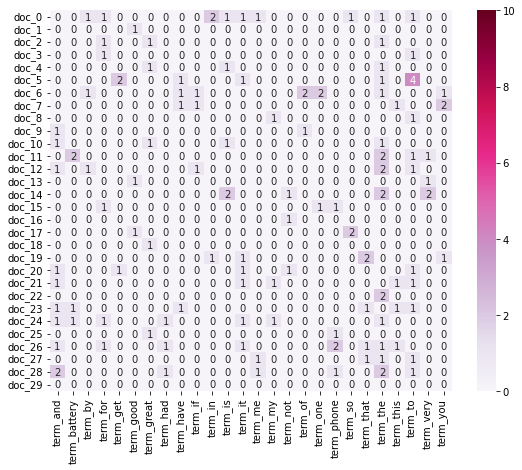

In [67]:
#pasted from exercise

import matplotlib.pyplot as plt
import seaborn as sns

plot_x = []
plot_z = []
for i in range(len(count_vect.get_feature_names())):
    s = 0
    for j in range(30):
        s += int(D_counts[j, i])
    if (s > 2) :
        plot_x.append("term_"+str(count_vect.get_feature_names()[i]))
        plot_y = ["doc_"+ str(j) for j in list(D.index)[0:30]]
        plot_z_temp = [int(D_counts[k, i]) for k in range(30)]
        plot_z.append(plot_z_temp)
plot_z = np.array(plot_z).T
print(plot_z)

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=10, annot=True)

Now we operate PCA on this dataset:

In [68]:
from sklearn.decomposition import PCA

In [73]:
D_counts = count_vect.fit_transform(D.text)

In [75]:
D_reduced = PCA(n_components = 2).fit_transform(D_counts.toarray())

In [77]:
D_reduced[:10]

array([[ 0.53117624,  0.29542265],
       [-0.89432429, -0.35842501],
       [ 0.01667016, -0.66801354],
       [-0.7329776 ,  0.01361897],
       [ 0.13145931, -0.59490416],
       [ 0.49073693,  0.94958907],
       [ 0.56719232, -0.49721741],
       [-0.78486996, -0.08471488],
       [-0.7755674 , -0.00440704],
       [-0.38452143,  0.42627155]])

In [78]:
categories = [0, 1]

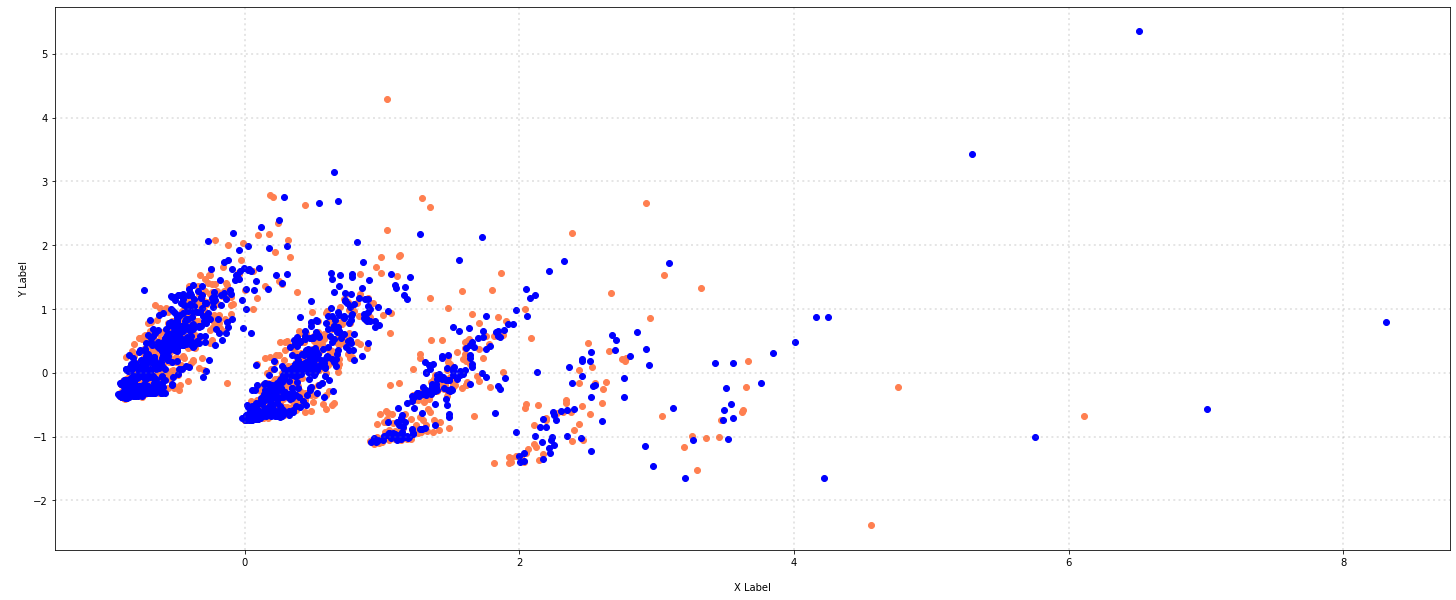

In [79]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = D_reduced[D['sgn'] == category].T[0]
    ys = D_reduced[D['sgn'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

Phrase frequency:

In [80]:
#pasted
term_frequencies = []
for j in range(0, D_counts.shape[1]):
    term_frequencies.append(sum(D_counts[:,j].toarray()))

In [81]:
term_frequencies = np.asarray(D_counts.sum(axis=0))[0]

In [83]:
term_frequencies[:20]

array([ 1, 38,  3,  2,  4,  3,  3,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1], dtype=int32)

d:\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


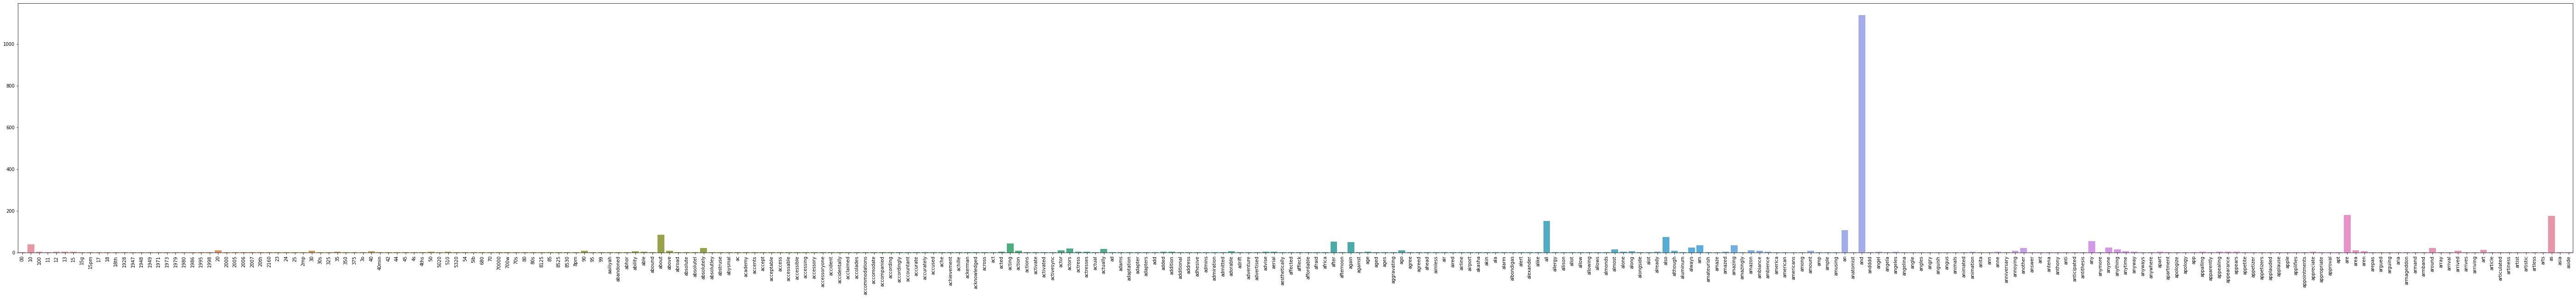

In [84]:
#pasted
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

TF-IDF

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
D_tfidf = vectorizer.fit_transform(D.text)

In [101]:
D_tfidf[0:16, 20:60].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0. 

That's a lot more challenging for me... I can do it.

---fourth---

1.
Methods used in the lab often search for words that is really common in every sentences, such as 'the', 'a'. These words have very minimum meanings, thus it is prefered to be completely dropped out. The more our tokenizer being precise on catching keywords, the easier for us to actually analyze the data.